In [2]:
import os
import numpy as np
import cv2
import ast

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [1]:
#### I'm not able to install the Tensorflow/Keras library on my laptop!
#### It works on Anaconda though.
from tensorflow.keras.models import Sequential

ModuleNotFoundError: No module named 'tensorflow'

In [5]:
LETTERS = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
SMALL_LETTERS = [x.lower() for x in LETTERS]
NUMBERS = ['0','1','2','3','4','5','6','7','8','9']
SYMBOLS = ['@','$','&',',','period','-']

In [6]:
# Import the data
#### This cell takes ~90s to execute (for color data)
#### This cell takes ~20s to execute (for gray data)

X = []
y = []

for letter in LETTERS:

    with open(fr".\Uppercase\{letter}\{letter}.txt", "r") as newfile:
        
        for i in range(35):
            target, data = newfile.readline().split("::")
            data = ast.literal_eval(data)
            y.append(target)
            X.append(data)

In [8]:
# print(y[0]) # A
# print(np.array(y).shape) # (910,)
# print(np.array(y).ndim) # 1
# print(np.array(X).shape) # (910, 73, 73, 3)
# print(np.array(X).ndim) # 4
# print(type(X[0])) $ <class 'list'>
# # print(X[0])

In [7]:
# Trying to reshape the X-input data
X = np.array(X)
y = np.array(y)

X = X.reshape((910,-1))

In [9]:
# Split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
# print(y_test)
print(X_train.shape)
print(X_test[0])

(609, 15987)
[247 247 247 ... 254 254 254]


In [11]:
# Instantiate model object

decision_tree_model = DecisionTreeClassifier()

In [12]:
# Fit the model with training data

decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
# Evaluate the model (with testing data)

predictions = decision_tree_model.predict(X_test)

In [14]:
# Evaluate the model
#### Need to assess predictions vs. y_test

classification_report(y_test, predictions)


'              precision    recall  f1-score   support\n\n           A       0.57      0.36      0.44        11\n           B       0.38      0.27      0.32        11\n           C       0.30      0.21      0.25        14\n           D       0.06      0.10      0.07        10\n           E       0.15      0.30      0.20        10\n           F       0.42      0.56      0.48         9\n           G       0.36      0.73      0.48        11\n           H       0.29      0.25      0.27         8\n           I       0.60      0.33      0.43        18\n           J       0.71      0.36      0.48        14\n           K       0.43      0.20      0.27        15\n           L       0.41      0.70      0.52        10\n           M       0.44      0.50      0.47        14\n           N       0.18      0.18      0.18        11\n           O       0.17      0.18      0.17        11\n           P       0.29      0.29      0.29        14\n           Q       0.29      0.17      0.21        12\n       

In [15]:
confusion_matrix(y_test, predictions)

array([[4, 1, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 3, 1, 1, 4, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 1, 3, 3, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
        0, 1, 0, 0],
       [0, 2, 1, 1, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0],
       [0, 1, 0, 2, 3, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0],
       [0, 0, 1, 1, 1, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 8, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0],
       [0, 0, 0, 3, 1, 1, 0, 0, 6, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 2],
       [0, 0, 1, 0, 1, 1, 2, 0, 3, 5, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 3, 1, 0, 1, 

In [16]:
# Not sure how to interpret the above two reports...so we will instead use plots!

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.dpi"] = 150

<AxesSubplot:>

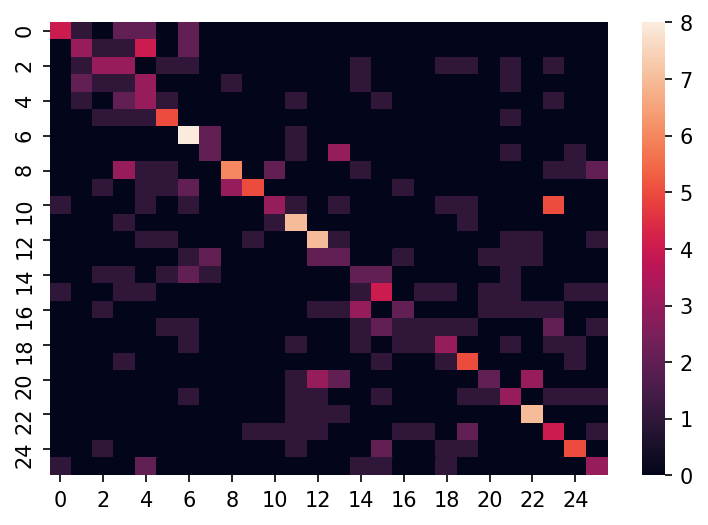

In [17]:
sns.heatmap(confusion_matrix(y_test,predictions))

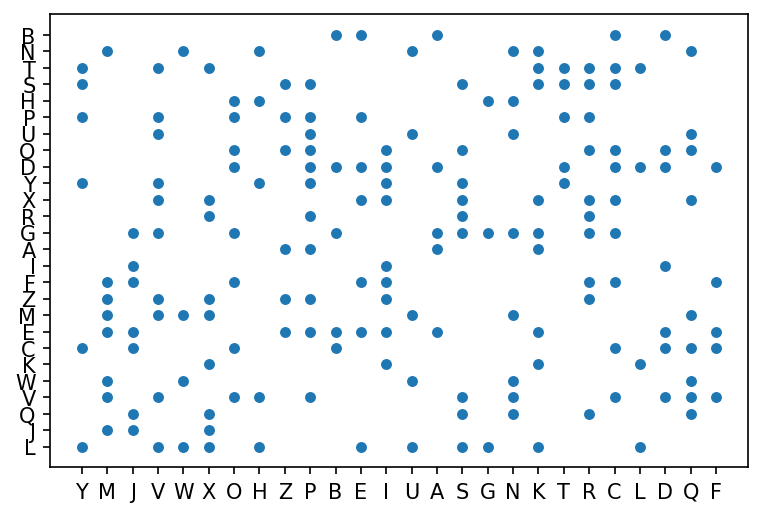

In [18]:
fig, axes = plt.subplots(1,1)

# axes.plot(y_test, predictions)

#### NOTE: The lines below only change the tick LABELS!!! They don't affect the data points!
# axes.set_xticklabels(LETTERS)
# axes.set_yticklabels(LETTERS)

ax = sns.scatterplot(x = y_test,
                y = predictions)
# ax.set_xlim(LETTERS)

In [18]:
y_test

array(['Y', 'M', 'J', 'V', 'W', 'X', 'O', 'H', 'Z', 'V', 'P', 'Z', 'B',
       'E', 'I', 'U', 'A', 'M', 'S', 'O', 'I', 'G', 'G', 'N', 'N', 'X',
       'K', 'T', 'T', 'I', 'B', 'N', 'G', 'U', 'J', 'S', 'R', 'A', 'J',
       'O', 'G', 'K', 'B', 'C', 'V', 'G', 'I', 'C', 'K', 'L', 'V', 'S',
       'N', 'R', 'H', 'C', 'D', 'D', 'W', 'P', 'Y', 'B', 'U', 'P', 'H',
       'E', 'Z', 'O', 'Z', 'J', 'M', 'W', 'Q', 'U', 'J', 'M', 'Y', 'I',
       'U', 'B', 'M', 'F', 'I', 'D', 'B', 'J', 'H', 'N', 'D', 'T', 'G',
       'U', 'H', 'I', 'M', 'Q', 'X', 'C', 'H', 'I', 'E', 'G', 'L', 'X',
       'J', 'R', 'Y', 'Q', 'V', 'Q', 'G', 'I', 'G', 'T', 'I', 'W', 'Q',
       'P', 'Z', 'C', 'V', 'D', 'J', 'R', 'P', 'H', 'J', 'C', 'F', 'F',
       'E', 'I', 'R', 'O', 'O', 'B', 'K', 'S', 'T', 'J', 'X', 'K', 'I',
       'B', 'S', 'S', 'W', 'I', 'Z', 'I', 'N', 'A', 'A', 'T', 'L', 'O',
       'Z', 'D', 'C', 'K', 'F', 'C', 'J', 'M', 'G', 'O', 'Y', 'P', 'A',
       'B', 'P', 'R', 'J', 'T', 'C', 'U', 'V', 'Q', 'Y', 'M', 'W

In [19]:
predictions

array(['T', 'M', 'J', 'V', 'W', 'X', 'O', 'H', 'Z', 'X', 'P', 'Z', 'F',
       'F', 'I', 'U', 'A', 'M', 'S', 'U', 'I', 'G', 'G', 'H', 'N', 'X',
       'F', 'T', 'T', 'I', 'B', 'N', 'G', 'U', 'I', 'L', 'R', 'G', 'J',
       'G', 'G', 'K', 'B', 'C', 'V', 'G', 'I', 'C', 'T', 'L', 'V', 'S',
       'N', 'R', 'F', 'C', 'D', 'U', 'W', 'F', 'Y', 'B', 'U', 'B', 'N',
       'E', 'Z', 'O', 'B', 'J', 'M', 'W', 'L', 'U', 'J', 'M', 'T', 'S',
       'U', 'B', 'M', 'F', 'T', 'C', 'P', 'I', 'H', 'N', 'D', 'T', 'G',
       'U', 'H', 'J', 'M', 'J', 'X', 'C', 'H', 'I', 'E', 'G', 'T', 'C',
       'I', 'R', 'T', 'G', 'V', 'Q', 'C', 'I', 'G', 'F', 'I', 'W', 'G',
       'F', 'Z', 'F', 'V', 'D', 'E', 'C', 'R', 'H', 'J', 'C', 'F', 'L',
       'E', 'T', 'R', 'O', 'C', 'B', 'X', 'S', 'T', 'I', 'X', 'K', 'I',
       'D', 'C', 'C', 'W', 'I', 'Z', 'C', 'N', 'A', 'A', 'J', 'L', 'O',
       'Z', 'D', 'C', 'F', 'F', 'C', 'C', 'M', 'L', 'O', 'Y', 'D', 'A',
       'B', 'P', 'R', 'J', 'T', 'C', 'L', 'U', 'C', 'Y', 'M', 'W

In [19]:
# Manually determine percent accuracy
count=0
for i in range(len(y_test)):
    if y_test[i] == predictions[i]:
        count+=1

percent = count/len(y_test) * 100
print("Number of predictions made: ", len(y_test))
print("Number correct: ", count)
print("Percentage correct: ", round(percent, 2), "%")

Number of predictions made:  301
Number correct:  100
Percentage correct:  33.22 %


Wow, terrible results! We can try to use a random forest model:

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
num_trees=100 # Default is 100
random_forest_model = RandomForestClassifier(n_estimators=num_trees)

In [22]:
random_forest_model.fit(X_train,y_train)

RandomForestClassifier()

In [23]:
predictions2 = random_forest_model.predict(X_test)

<AxesSubplot:>

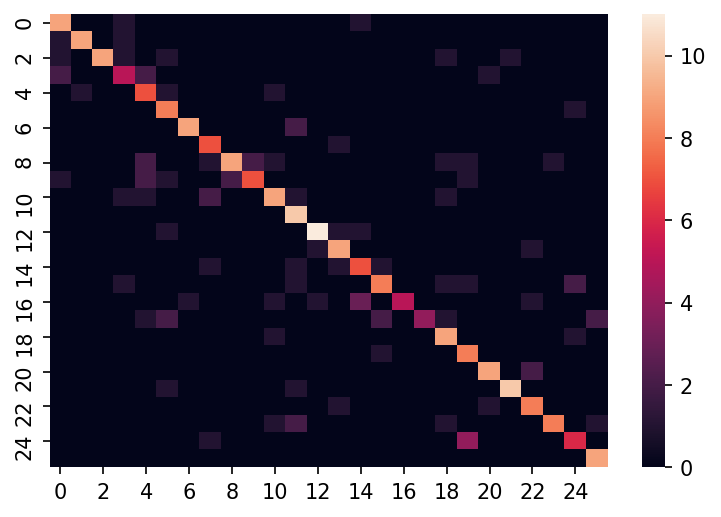

In [24]:
sns.heatmap(confusion_matrix(y_test,predictions2))

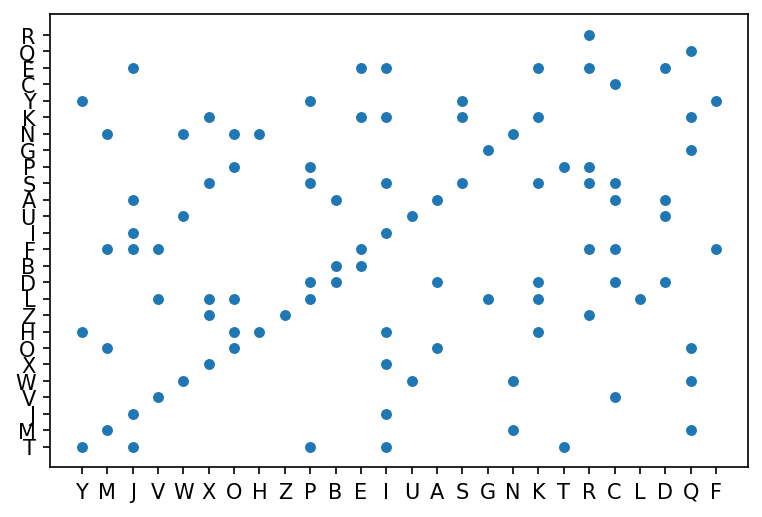

In [26]:
fig, axes = plt.subplots(1,1)

# axes.plot(y_test, predictions)

#### NOTE: The lines below only change the tick LABELS!!! They don't affect the data points!
# axes.set_xticklabels(LETTERS)
# axes.set_yticklabels(LETTERS)

ax = sns.scatterplot(x = y_test,
                y = predictions2)
# ax.set_xlim(LETTERS)

In [27]:
# Manually determine percent accuracy
count=0
for i in range(len(y_test)):
    if y_test[i] == predictions2[i]:
        count+=1

percent = count/len(y_test) * 100
print("Number of predictions made: ", len(y_test))
print("Number correct: ", count)
print("Percentage correct: ", round(percent, 2), "%")

Number of predictions made:  301
Number correct:  209
Percentage correct:  69.44 %
